# Three Qubit Gates

In [2]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import *
import matplotlib.pyplot as plt

## Three-qubit gates


There are two commonly-used three-qubit gates. For three qubits, the basis vectors are ordered as

$$\left|000\right\rangle, \left|001\right\rangle, \left|010\right\rangle, \left|011\right\rangle, \left|100\right\rangle, \left|101\right\rangle, \left|110\right\rangle, \left|111\right\rangle,$$

which, as bitstrings, represent the integers $0,1,2,\cdots, 7$. Again, Qiskit uses a representation in which the first qubit is on the right-most side of the tensor product and the third qubit is on the left-most side:

$$\left|abc\right\rangle : \underset{\text{qubit 2}}{\left|a\right\rangle}\otimes \underset{\text{qubit 1}}{\left|b\right\rangle}\otimes \underset{\text{qubit 0}}{\left|c\right\rangle}.$$

### Toffoli gate ($ccx$ gate)

The [Toffoli gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Toffoli_(CCNOT)_gate) flips the third qubit if the first two qubits (LSB) are both $\left|1\right\rangle$:

$$\left|abc\right\rangle \rightarrow \left|bc\oplus a\right\rangle \otimes \left|b\right\rangle \otimes \left|c\right\rangle.$$

In matrix form, the Toffoli gate is
$$
C_{CX} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{pmatrix}.
$$

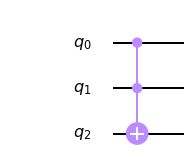

In [3]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw(output='mpl')

In [4]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


### Controlled swap gate (Fredkin Gate)

The [Fredkin gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Fredkin_(CSWAP)_gate), or the _controlled swap gate_, exchanges the second and third qubits if the first qubit (LSB) is $\left|1\right\rangle$:

$$ \left|abc\right\rangle \rightarrow \begin{cases} \left|bac\right\rangle~~\text{if}~c=1 \cr \left|abc\right\rangle~~\text{if}~c=0 \end{cases}.$$

In matrix form, the Fredkin gate is

$$
C_{\mathrm{SWAP}} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}.
$$

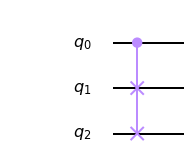

In [5]:
qc = QuantumCircuit(3)
qc.cswap(0,1,2)
qc.draw(output='mpl')

In [6]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


-------------